# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | bardai
Processing Record 4 of Set 1 | walvis bay
Processing Record 5 of Set 1 | hawaiian paradise park
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | tiksi
Processing Record 9 of Set 1 | badger
Processing Record 10 of Set 1 | kenai
Processing Record 11 of Set 1 | tazovsky
Processing Record 12 of Set 1 | lillehammer
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | minas de marcona
Processing Record 18 of Set 1 | moyynkum
Processing Record 19 of Set 1 | kristiansund
Processing Record 20 of Set 1 | college
Processing Record 21 of Set 1 | dharangaon
Processing Record 22 of Set 1 | grytviken

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,avarua,-21.2078,-159.7750,75.25,73,100,12.66,CK,1731629853
1,edinburgh of the seven seas,-37.0676,-12.3116,60.40,92,92,20.42,SH,1731629854
2,bardai,11.6500,7.2333,70.54,22,0,9.37,NG,1731629855
3,walvis bay,-22.9575,14.5053,60.53,84,3,4.21,NA,1731629857
4,hawaiian paradise park,19.5933,-154.9731,78.31,80,100,12.66,US,1731629858


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,75.25,73,100,12.66,CK,1731629853
1,edinburgh of the seven seas,-37.0676,-12.3116,60.40,92,92,20.42,SH,1731629854
2,bardai,11.6500,7.2333,70.54,22,0,9.37,NG,1731629855
3,walvis bay,-22.9575,14.5053,60.53,84,3,4.21,NaN,1731629857
4,hawaiian paradise park,19.5933,-154.9731,78.31,80,100,12.66,US,1731629858


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

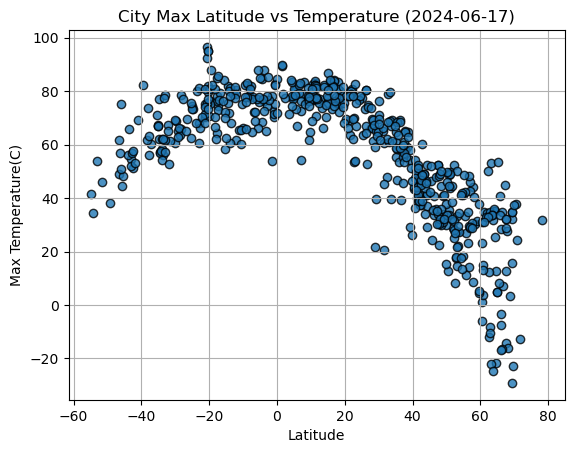

In [14]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')
plt.title(f"City Max Latitude vs Temperature (2024-06-17)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

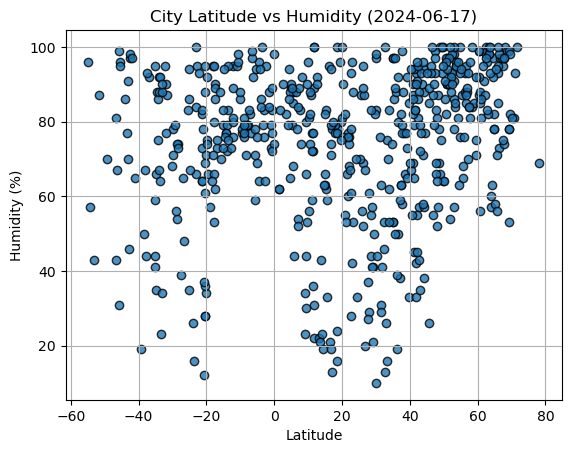

In [16]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"City Latitude vs Humidity (2024-06-17)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

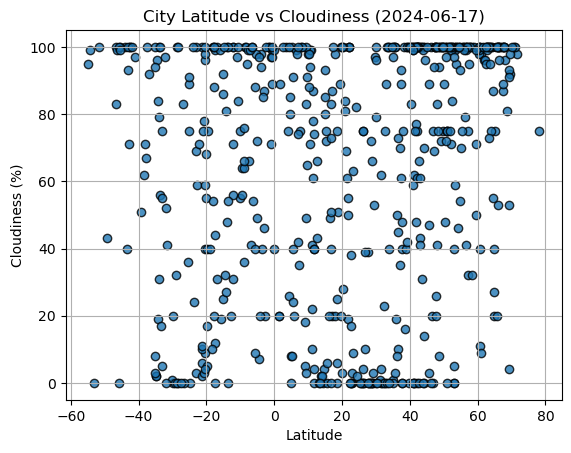

In [18]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"City Latitude vs Cloudiness (2024-06-17)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

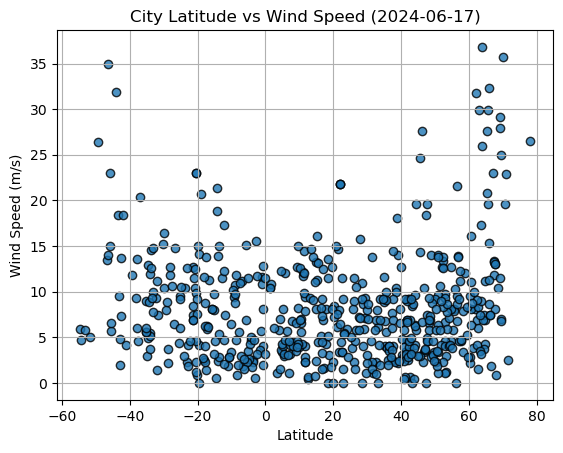

In [20]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title(f"City Latitude vs Wind Speed (2024-06-17)")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
from scipy import stats

In [33]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)


City_ID
2      79.608051
4      70.690409
5      64.036952
6      48.697347
7      12.206563
         ...    
559    67.566826
562    21.111406
563    50.796276
565    24.160557
566    61.530609
Name: Lat, Length: 392, dtype: float64


In [24]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.01x +7.89


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df= (city_data_df[city_data_df["Lat"] >=0])
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bardai,11.6500,7.2333,70.54,22,0,9.37,NG,1731629855
4,hawaiian paradise park,19.5933,-154.9731,78.31,80,100,12.66,US,1731629858
5,tura,25.5198,90.2201,63.63,87,0,3.80,IN,1731629694
6,hamilton,39.1834,-84.5333,54.41,92,100,14.00,US,1731629770
7,tiksi,71.6872,128.8694,-12.59,100,98,2.51,RU,1731629861


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df= (city_data_df[city_data_df["Lat"] < 0])
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,avarua,-21.2078,-159.7750,75.25,73,100,12.66,CK,1731629853
1,edinburgh of the seven seas,-37.0676,-12.3116,60.40,92,92,20.42,SH,1731629854
3,walvis bay,-22.9575,14.5053,60.53,84,3,4.21,NaN,1731629857
12,puerto natales,-51.7236,-72.4875,46.02,87,100,5.03,CL,1731629867
14,port mathurin,-19.6833,63.4167,76.15,75,17,14.16,MU,1731629869


###  Temperature vs. Latitude Linear Regression Plot

The r^2-value is: 0.7361392200400441


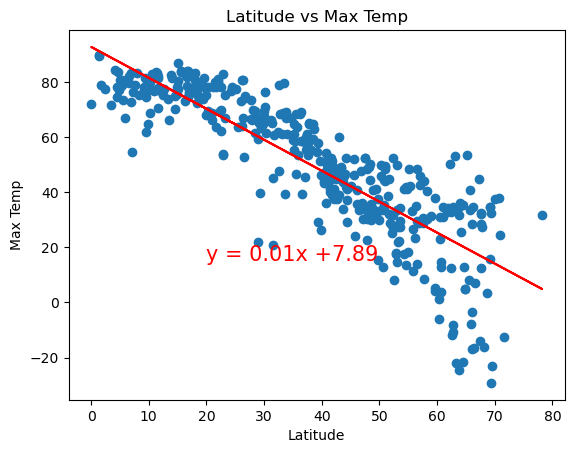

In [35]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

City_ID
0      70.691205
1      62.571057
3      69.795366
12     55.067249
14     71.471742
         ...    
556    73.911965
558    68.639843
560    71.791125
561    78.289784
564    76.935299
Name: Lat, Length: 175, dtype: float64


In [45]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = 0.51x +81.55


The r^2-value is: 0.4004743448564634


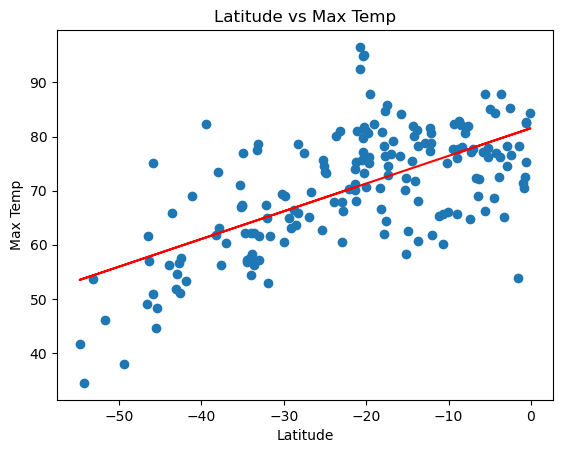

In [47]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Max Temp")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Northern Hemisphere:
#there is a negative correlation 

#Southern Hemisphere
#there is a positive correlation

### Humidity vs. Latitude Linear Regression Plot

In [53]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)



City_ID
2      64.882258
4      67.866745
5      70.093472
6      75.227212
7      87.439663
         ...    
559    68.912122
562    84.459459
563    74.524759
565    83.438993
566    70.932276
Name: Lat, Length: 392, dtype: float64
y = 0.38x +60.51


The r^2-value is: 0.11098469268860552


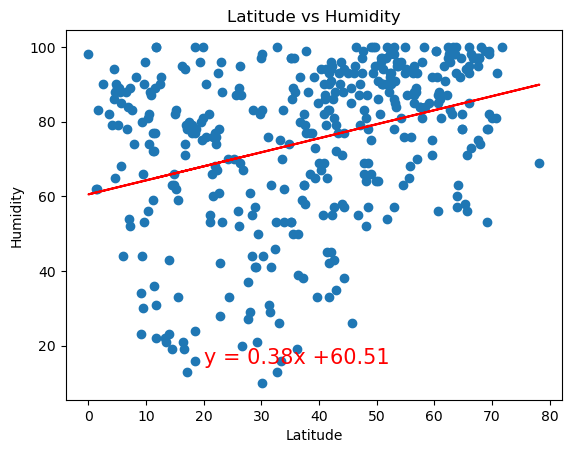

In [55]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

In [61]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0      74.374191
1      69.913842
3      73.882112
12     65.792045
14     74.802935
         ...    
556    76.143335
558    73.247390
560    74.978370
561    78.548044
564    77.804034
Name: Lat, Length: 175, dtype: float64
y = 0.28x +80.34


The r^2-value is: 0.040343726208304266


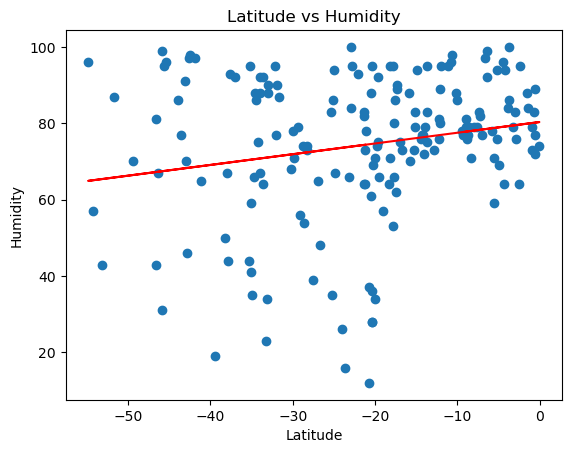

In [63]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Humidity")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Nothern Hempisphere:
#there is a slight positive correlation

#Southern Hempisphere:
#there is a slight positive correlation

### Cloudiness vs. Latitude Linear Regression Plot

In [67]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
2      46.214273
4      51.389991
5      55.251597
6      64.154565
7      85.333485
         ...    
559    53.202890
562    80.165194
563    62.936365
565    78.395495
566    56.706256
Name: Lat, Length: 392, dtype: float64
y = 0.65x +38.62


The r^2-value is: 0.1060276173994622


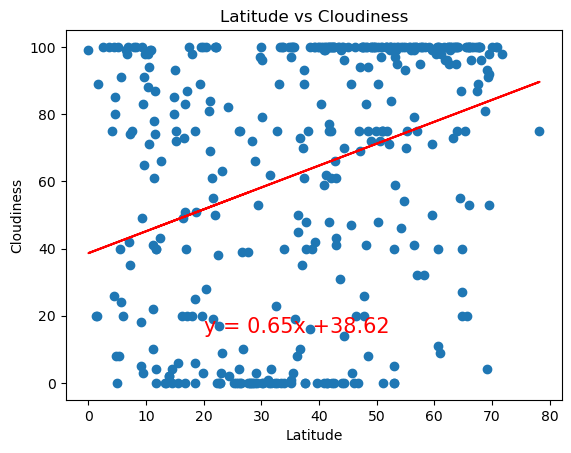

In [69]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

In [73]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0      61.714296
1      59.845364
3      61.508110
12     58.118289
14     61.893944
         ...    
556    62.455585
558    61.242155
560    61.967453
561    63.463183
564    63.151435
Name: Lat, Length: 175, dtype: float64
y = 0.12x +64.21


The r^2-value is: 0.0019457511222857062


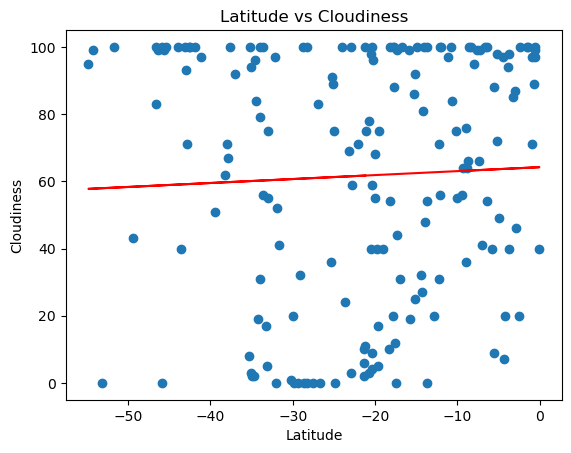

In [75]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Cloudiness")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Nothern Hempisphere:
#there is no correlation 

#Southern Hempisphere:
#there is no correlation 

### Wind Speed vs. Latitude Linear Regression Plot

In [79]:
# Northern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
2       5.540762
4       6.224662
5       6.734921
6       7.911326
7      10.709829
         ...    
559     6.464212
562    10.026911
563     7.750357
565     9.793069
566     6.927134
Name: Lat, Length: 392, dtype: float64
y = 0.09x +4.54


The r^2-value is: 0.07246180054947689


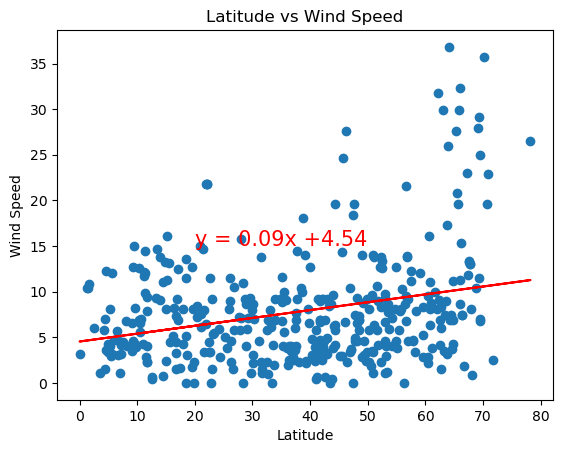

In [81]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

In [87]:
# Southern Hemisphere
# YOUR CODE HERE
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

City_ID
0       8.398538
1      10.367967
3       8.615811
12     12.187911
14      8.209230
         ...    
556     7.617388
558     8.896067
560     8.131768
561     6.555609
564     6.884120
Name: Lat, Length: 175, dtype: float64
y = -0.12x +5.77


The r^2-value is: 0.08220119869165163


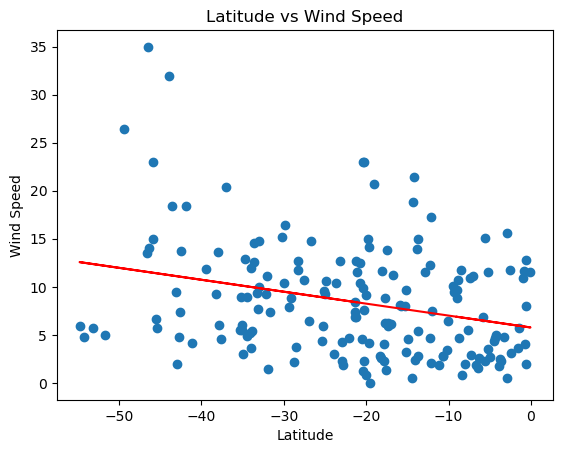

In [89]:
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.title(f"Latitude vs Wind Speed")

print(f"The r^2-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
#Nothern Hempisphere:
#there is a positive correlation 

#Southern Hempisphere:
#there is negative correlation 